## Agenda
   
    ♦ Problem Description
    ♦ Data Understanding and exploration
    ♦ Split the data into Train and Validation sets
    ♦ Model Building
       - Logistic Regression
       - ROC curve to fix the threshold values
    ♦ Construct a confusion matrix
    ♦ Evaluation of the error metrics
    ♦ How do we implement Regularization techniques
    ♦ Build model using Naive Bayes classifier
    ♦ Compute Evaluation metrics
    ♦ Prinicpal Component Analysis
    

## Problem Description

A Regional Bank XYZ with 40000+ Customers would like to expand its business by predicting Customer's behavior to better sell cross products (eg: Selling Term Deposits to Retail Customers). The Bank has approached us to assess the same by providing access to their Customer campaign data. 

The data is related with direct marketing campaigns. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

Predict if an existing customer would subscribe to a Term Deposit

#### Attribute information:



Input variables:

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                   "blue-collar","self-employed","retired","technician","services") 

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric) 

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no") 

##### Related with the last contact of the current campaign:

9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 

10 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

11 - duration: last contact duration, in seconds (numeric)

##### Other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

##### Output variable (desired target):

16 - y - has the client subscribed a term deposit? (binary: "yes","no")

 

In [201]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score,recall_score,precision_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB 
from sklearn.naive_bayes import GaussianNB 
%matplotlib inline

### Loading the data

In [202]:
df=pd.read_csv("Bank_Data.csv")

In [203]:
df

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,feb,129,4,211,3,other,no


### Understanding the data

In [204]:
df.shape

(4521, 16)

In [205]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [206]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,may,226,1,-1,0,unknown,no


In [207]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,apr,345,2,249,7,other,no


### Summary statistics

In [208]:
df.describe()

,age,balance,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,3025.000000,50.000000,871.000000,25.000000


In [209]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')

In [210]:
df.y.value_counts(normalize=True) # frequency for each level within the target variable

no     0.88476
yes    0.11524
Name: y, dtype: float64

In [211]:
df.y.value_counts() # frequency for each level

no     4000
yes     521
Name: y, dtype: int64

### Recode the levels of target on  data ; yes=1 and no=0


In [212]:
df['y'] = df['y'].apply(lambda x: 0 if x.strip()=='no' else 1)


In [213]:
cat_attr=df.select_dtypes(include ='object').columns 

df[cat_attr]= df[cat_attr].astype('category')

In [214]:
cat_attr

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [215]:
data = pd.get_dummies(columns=cat_attr, data = df, prefix=cat_attr, prefix_sep="_", drop_first=True)
data.head()

,age,balance,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,79,1,-1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,33,4789,220,1,339,4,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,35,1350,185,1,330,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,199,4,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,59,0,226,1,-1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [216]:
data.columns

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

### Splitting the data into train and Validation sets

In [217]:
X = data.loc[:,data.columns.difference(['y'])] # taking all the independent columns
y = data.y # separting the target variable

In [218]:
X.head()

,age,balance,campaign,contact_telephone,contact_unknown,default_yes,duration,education_secondary,education_tertiary,education_unknown,...,month_mar,month_may,month_nov,month_oct,month_sep,pdays,poutcome_other,poutcome_success,poutcome_unknown,previous
0,30,1787,1,0,0,0,79,0,0,0,...,0,0,0,1,0,-1,0,0,1,0
1,33,4789,1,0,0,0,220,1,0,0,...,0,1,0,0,0,339,0,0,0,4
2,35,1350,1,0,0,0,185,0,1,0,...,0,0,0,0,0,330,0,0,0,1
3,30,1476,4,0,1,0,199,0,1,0,...,0,0,0,0,0,-1,0,0,1,0
4,59,0,1,0,1,0,226,1,0,0,...,0,1,0,0,0,-1,0,0,1,0


In [219]:
y[:6]

0    0
1    0
2    0
3    0
4    0
5    0
Name: y, dtype: int64

In [220]:
data['y'].value_counts(normalize=True)

0    0.88476
1    0.11524
Name: y, dtype: float64

In [221]:
np.arange(1,11)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [222]:
train_test_split(np.arange(1,11),test_size=0.3)

[array([ 2,  9,  6,  4,  8, 10,  7]), array([1, 5, 3])]

In [223]:
train_test_split(np.arange(1,11),test_size=0.3,random_state=3456)

[array([ 6,  4,  8,  1,  5, 10,  3]), array([9, 2, 7])]

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size = 0.3, random_state=2323)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=124)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3164, 41)
(1357, 41)
(3164,)
(1357,)


In [225]:
print('train - Stratification',y_train.value_counts())
print('test - Stratification',y_test.value_counts())

train - Stratification 0    2799
1     365
Name: y, dtype: int64
test - Stratification 0    1201
1     156
Name: y, dtype: int64


In [226]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size = 0.3, random_state=124)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2323)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3164, 41)
(1357, 41)
(3164,)
(1357,)


In [227]:
print('train - rand',y_train.value_counts())
print('test - rand',y_test.value_counts())

train - rand 0    2782
1     382
Name: y, dtype: int64
test - rand 0    1218
1     139
Name: y, dtype: int64


### Standardizing the numeric attributes in the train and test data

In [228]:
scaler = MinMaxScaler()
X_train[['age','balance','duration','pdays','previous','campaign']] = scaler.fit_transform(X_train[['age','balance','duration','pdays','previous','campaign']])
X_test[['age','balance','duration','pdays','previous','campaign']]=scaler.transform(X_test[['age','balance','duration','pdays','previous','campaign']])

/usr/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/share/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/usr/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [229]:
import statsmodels.api as sm


In [230]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

### Model Building

In [231]:
X_train.columns

Index(['const', 'age', 'balance', 'campaign', 'contact_telephone',
       'contact_unknown', 'default_yes', 'duration', 'education_secondary',
       'education_tertiary', 'education_unknown', 'housing_yes',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'loan_yes', 'marital_married', 'marital_single', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'pdays', 'poutcome_other', 'poutcome_success', 'poutcome_unknown',
       'previous'],
      dtype='object')

In [232]:

logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()

print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.238201
         Iterations 8
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.353      
Dependent Variable:  y                AIC:              1591.3336  
Date:                2022-05-28 16:59 BIC:              1845.8365  
No. Observations:    3164             Log-Likelihood:   -753.67    
Df Model:            41               LL-Null:          -1165.6    
Df Residuals:        3122             LLR p-value:      2.4625e-146
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      8.0000                                        
-------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const               -2.5251   0.6442 -3.9195 0.0001 -3.7877 -1.2624
age                 -0.2827   0.5815 -0.4

In [233]:
threshold = 0.5
train_preds_prob = result.predict(X_train)
train_preds = np.where(train_preds_prob>threshold,1,0)

test_preds_prob = result.predict(X_test)
test_preds = np.where(test_preds_prob>threshold,1,0)


#train_preds_prob=result.predict_proba(X_train[['age','const']])[:,1]
#test_preds = result.predict(X_test[['age','const']])
#test_preds_prob=result.predict_proba(X_test[['age','const']])[:,1]

In [234]:
train_preds_prob[:-15]

4209    0.856562
3748    0.080799
1516    0.019454
1364    0.021046
1735    0.022915
          ...   
3451    0.027925
1979    0.006162
1295    0.034643
1854    0.113595
3974    0.030998
Length: 3149, dtype: float64

In [111]:
train_preds[:5]

array([1, 0, 0, 0, 0])

In [235]:
train_accuracy_1= accuracy_score(y_train,train_preds)
train_recall_1= recall_score(y_train,train_preds)
train_precision_1= precision_score(y_train,train_preds)

test_accuracy_1= accuracy_score(y_test,test_preds)
test_recall_1= recall_score(y_test,test_preds)
test_precision_1= precision_score(y_test,test_preds)
print("************************************************")

print("Train Accuracy:",train_accuracy_1)
print('Train Recall:',train_recall_1)
print("Train Precision",train_precision_1)
print("************************************************")
print("Test Accuracy:",test_accuracy_1)
print("Test Recall:",test_recall_1)
print('Test Precision:',test_precision_1)

************************************************
Train Accuracy: 0.9048672566371682
Train Recall: 0.3769633507853403
Train Precision 0.6956521739130435
************************************************
Test Accuracy: 0.9056742815033162
Test Recall: 0.35251798561151076
Test Precision: 0.5632183908045977


In [113]:
rm(model_performance)

/bin/sh: 1: Syntax error: word unexpected (expecting ")")


In [114]:
model_performance = pd.DataFrame(np.array(['Logistic - SM',train_accuracy_1,train_recall_1,train_precision_1,
                                           test_accuracy_1,test_recall_1,test_precision_1]).reshape(1,7))

model_performance.columns = ['Model','Train Accuracy','Train Recall','Train Precision',
                             'Test Accuracy','Test Recall','Test Precision']

In [115]:
model_performance.columns = ['Model','Train Accuracy','Train Recall','Train Precision',
                             'Test Accuracy','Test Recall','Test Precision']

In [119]:
model_performance

,Model,Train Accuracy,Train Recall,Train Precision,Test Accuracy,Test Recall,Test Precision
0,Logistic - SM,0.9048672566371682,0.3769633507853403,0.6956521739130435,0.9056742815033162,0.35251798561151076,0.5632183908045977


In [120]:
result.params

const                  -2.525060
age                    -0.282732
balance                 0.074169
campaign               -3.115303
contact_telephone      -0.014696
contact_unknown        -1.557684
default_yes             0.462939
duration               13.014476
education_secondary     0.201635
education_tertiary      0.530381
education_unknown      -0.147957
housing_yes            -0.335724
job_blue-collar        -0.190074
job_entrepreneur        0.053273
job_housemaid          -0.256108
job_management         -0.170456
job_retired             0.582692
job_self-employed      -0.229770
job_services           -0.119026
job_student             0.587756
job_technician         -0.221328
job_unemployed         -0.579446
job_unknown             0.805236
loan_yes               -0.835450
marital_married        -0.614649
marital_single         -0.536694
month_aug              -0.462095
month_dec               0.219837
month_feb               0.050355
month_jan              -0.727088
month_jul 

In [121]:
result.model.exog_names

['const',
 'age',
 'balance',
 'campaign',
 'contact_telephone',
 'contact_unknown',
 'default_yes',
 'duration',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'housing_yes',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'loan_yes',
 'marital_married',
 'marital_single',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'pdays',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown',
 'previous']

In [122]:
coeffecients = pd.DataFrame(result.params,result.model.exog_names)
coeffecients.columns = ['SM']
coeffecients

,SM
const,-2.525060
age,-0.282732
balance,0.074169
campaign,-3.115303
contact_telephone,-0.014696
contact_unknown,-1.557684
default_yes,0.462939
duration,13.014476
education_secondary,0.201635
education_tertiary,0.530381


### Logistic Regression - Sklearn Implementation

In [123]:
logistic_model = LogisticRegression(penalty='none')

logistic_model.fit(X_train,y_train)

LogisticRegression(penalty='none')

In [124]:
logistic_model.coef_.T

array([[-1.262595  ],
       [-0.28272691],
       [ 0.07760831],
       [-3.11421466],
       [-0.01481096],
       [-1.55766223],
       [ 0.4631301 ],
       [13.01530473],
       [ 0.20162055],
       [ 0.5302938 ],
       [-0.14823865],
       [-0.33573321],
       [-0.18996816],
       [ 0.05346385],
       [-0.25614317],
       [-0.17025238],
       [ 0.58283645],
       [-0.22972768],
       [-0.11873166],
       [ 0.58801103],
       [-0.2211415 ],
       [-0.57927578],
       [ 0.80517987],
       [-0.83537367],
       [-0.61464874],
       [-0.53670319],
       [-0.46218563],
       [ 0.22079255],
       [ 0.05020384],
       [-0.72735609],
       [-0.89533378],
       [ 0.57398313],
       [ 1.62436918],
       [-0.42131252],
       [-0.77769801],
       [ 1.40525157],
       [ 0.53062655],
       [-0.39579963],
       [ 0.4533293 ],
       [ 2.51890408],
       [ 0.05546769],
       [-0.14453286]])

In [125]:
logistic_model.coef_.T.shape

(42, 1)

In [126]:
coeffecients['SKLearn'] = logistic_model.coef_.T

In [127]:
coeffecients

,SM,SKLearn
const,-2.525060,-1.262595
age,-0.282732,-0.282727
balance,0.074169,0.077608
campaign,-3.115303,-3.114215
contact_telephone,-0.014696,-0.014811
contact_unknown,-1.557684,-1.557662
default_yes,0.462939,0.463130
duration,13.014476,13.015305
education_secondary,0.201635,0.201621
education_tertiary,0.530381,0.530294


### Generating predictions

In [128]:
train_preds = logistic_model.predict(X_train)
train_preds_prob=logistic_model.predict_proba(X_train)[:,1]
test_preds = logistic_model.predict(X_test)
test_preds_prob=logistic_model.predict_proba(X_test)[:,1]

In [129]:
train_preds_prob[:5]

array([0.85664702, 0.08079027, 0.01945116, 0.02104693, 0.02291449])

### Confusion Matrix

In [130]:
confusion_matrix(y_train,train_preds)

array([[2719,   63],
       [ 238,  144]])

In [131]:
train_accuracy_2= accuracy_score(y_train,train_preds)
train_recall_2= recall_score(y_train,train_preds)
train_precision_2= precision_score(y_train,train_preds)

test_accuracy_2= accuracy_score(y_test,test_preds)
test_recall_2= recall_score(y_test,test_preds)
test_precision_2= precision_score(y_test,test_preds)
print("************************************************")

print("Train Accuracy:",train_accuracy_2)
print('Train Recall:',train_recall_2)
print("Train Precision",train_precision_2)
print("************************************************")
print("Test Accuracy:",test_accuracy_2)
print("Test Recall:",test_recall_2)
print('Test Precision:',test_precision_2)

************************************************
Train Accuracy: 0.9048672566371682
Train Recall: 0.3769633507853403
Train Precision 0.6956521739130435
************************************************
Test Accuracy: 0.9056742815033162
Test Recall: 0.35251798561151076
Test Precision: 0.5632183908045977


In [132]:

d= np.array(['Logistic - SK',train_accuracy_2,train_recall_2,train_precision_2,
                                           test_accuracy_2,test_recall_2,test_precision_2]).reshape(1,7)
model_performance = model_performance.append(pd.DataFrame(d,columns=model_performance.columns))

In [133]:
model_performance

,Model,Train Accuracy,Train Recall,Train Precision,Test Accuracy,Test Recall,Test Precision
0,Logistic - SM,0.9048672566371682,0.3769633507853403,0.6956521739130435,0.9056742815033162,0.35251798561151076,0.5632183908045977
0,Logistic - SK,0.9048672566371682,0.3769633507853403,0.6956521739130435,0.9056742815033162,0.35251798561151076,0.5632183908045977


In [134]:
coeffecients

,SM,SKLearn
const,-2.525060,-1.262595
age,-0.282732,-0.282727
balance,0.074169,0.077608
campaign,-3.115303,-3.114215
contact_telephone,-0.014696,-0.014811
contact_unknown,-1.557684,-1.557662
default_yes,0.462939,0.463130
duration,13.014476,13.015305
education_secondary,0.201635,0.201621
education_tertiary,0.530381,0.530294


In [135]:
#Classification report
print(classification_report(y_train,train_preds))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2782
           1       0.70      0.38      0.49       382

    accuracy                           0.90      3164
   macro avg       0.81      0.68      0.72      3164
weighted avg       0.89      0.90      0.89      3164



In [136]:
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1218
           1       0.56      0.35      0.43       139

    accuracy                           0.91      1357
   macro avg       0.75      0.66      0.69      1357
weighted avg       0.89      0.91      0.90      1357



### ROC and AUC

In [196]:
fpr, tpr, threshold = roc_curve(y_train, train_preds_prob)
roc_auc = auc(fpr, tpr)

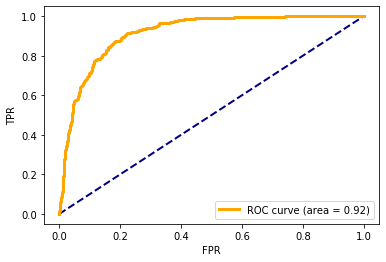

In [199]:
%matplotlib inline
# plt.figure()
plt.plot([0,1],[0,1],color='navy', lw=2, linestyle='--')
plt.plot(fpr,tpr,color='orange', lw=3, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")


### Manual inspection of threshold value

In [139]:
roc_df = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':threshold})

roc_df

,FPR,TPR,Threshold
0,0.000000,0.000000,1.999906
1,0.000000,0.002618,0.999906
2,0.000000,0.010471,0.996288
3,0.000359,0.010471,0.995689
4,0.000359,0.015707,0.994619
...,...,...,...
435,0.654925,0.994764,0.023283
436,0.654925,0.997382,0.023230
437,0.864486,0.997382,0.010018
438,0.864486,1.000000,0.009909


In [140]:
roc_df.sort_values('TPR',ascending=False,inplace=True)


In [141]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = threshold[optimal_idx]

In [142]:
optimal_threshold

0.09480057416803792

In [143]:
custom_threshold = 0.099


## To get in 0-1 format vector (pandas Series)
final_pred_array = pd.Series([0 if x>custom_threshold else 1 for x in train_preds_prob])
final_pred_array.value_counts()

final_test_pred_array = pd.Series([0 if x>custom_threshold else 1 for x in test_preds_prob])
final_test_pred_array.value_counts()

1    996
0    361
dtype: int64

In [144]:
## To get True-False format vector (pandas Series)
final_pred = pd.Series(train_preds_prob > 0.099)
final_pred.value_counts()
final_test_pred=pd.Series(test_preds_prob > 0.099)

In [145]:
print(classification_report(y_train,final_pred))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      2782
           1       0.38      0.86      0.53       382

    accuracy                           0.82      3164
   macro avg       0.68      0.83      0.71      3164
weighted avg       0.90      0.82      0.84      3164



In [146]:
print(classification_report(y_test,final_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      1218
           1       0.32      0.83      0.46       139

    accuracy                           0.80      1357
   macro avg       0.65      0.81      0.67      1357
weighted avg       0.91      0.80      0.84      1357



In [147]:
train_accuracy= accuracy_score(y_train,final_pred)
train_recall= recall_score(y_train,final_pred)
train_precision= precision_score(y_train,final_pred)
print(train_accuracy)
print(train_recall)

test_accuracy= accuracy_score(y_test,final_test_pred)
test_recall= recall_score(y_test,final_test_pred)
test_precision= precision_score(y_train,final_pred)

print(test_accuracy)
print(test_recall)

0.8151074589127687
0.8586387434554974
0.8010316875460575
0.8273381294964028


In [148]:
d1= np.array(['Logistic - SK Threoshold',train_accuracy,train_recall,train_precision,
                                           test_accuracy,test_recall,test_precision]).reshape(1,7)
model_performance = model_performance.append(pd.DataFrame(d1,columns=model_performance.columns))

In [149]:
model_performance

,Model,Train Accuracy,Train Recall,Train Precision,Test Accuracy,Test Recall,Test Precision
0,Logistic - SM,0.9048672566371682,0.3769633507853403,0.6956521739130435,0.9056742815033162,0.35251798561151076,0.5632183908045977
0,Logistic - SK,0.9048672566371682,0.3769633507853403,0.6956521739130435,0.9056742815033162,0.35251798561151076,0.5632183908045977
0,Logistic - SK Threoshold,0.8151074589127687,0.8586387434554974,0.3818393480791618,0.8010316875460575,0.8273381294964028,0.3818393480791618


### Logistic model 2 -   Using Penalty as 'L1' - Lasso Regression Model

In [150]:
l1_model = LogisticRegression(penalty='l1', solver='saga')

l1_model.fit(X_train,y_train)

l1_train_pred = l1_model.predict(X_train)
l1_test_pred = l1_model.predict(X_test)

In [151]:
coeffecients['Lasso'] = l1_model.coef_.T

In [152]:
coeffecients.shape

(42, 3)

In [154]:
coeffecients[coeffecients.Lasso!=0].shape

(31, 3)

#### Confusion Matrix for model2

In [155]:
confusion_matrix(y_train,l1_train_pred)

array([[2722,   60],
       [ 246,  136]])

In [156]:
train_pred_prob = l1_model.predict_proba(X_train)[:,1]
train_pred_classes=l1_model.predict(X_train)
print(train_pred_classes)

test_pred_classes=l1_model.predict(X_test)
test_pred_prob=l1_model.predict_proba(X_train)[:,1]

[1 0 0 ... 0 0 0]


In [157]:
l1_model.coef_

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -6.22818696e-01,  0.00000000e+00, -1.41992176e+00,
         2.00992206e-01,  1.22803488e+01,  1.62271731e-01,
         4.43900122e-01,  0.00000000e+00, -3.44115257e-01,
        -6.40221763e-02,  8.23726976e-03, -9.92628615e-03,
        -1.51570355e-02,  5.81216628e-01,  0.00000000e+00,
         0.00000000e+00,  5.70694951e-01, -7.02756444e-02,
        -2.74435828e-01,  4.46496999e-01, -7.53213097e-01,
        -5.37535765e-01, -3.93213976e-01, -5.02740655e-01,
         0.00000000e+00,  0.00000000e+00, -5.70877043e-01,
        -8.67322525e-01,  4.23446750e-01,  1.39742492e+00,
        -4.32172582e-01, -6.91567400e-01,  1.28915802e+00,
         3.73076650e-01,  0.00000000e+00,  2.63446949e-01,
         2.32520071e+00,  2.75448114e-03,  0.00000000e+00]])

In [158]:
train_accuracy_3 = accuracy_score(y_train,train_pred_classes)
train_recall_3 = recall_score(y_train,train_pred_classes)
train_precision_3 = precision_score(y_train,train_pred_classes)

test_accuracy_3= accuracy_score(y_test,test_pred_classes)
test_recall_3= recall_score(y_test,test_pred_classes)
test_precision_3= precision_score(y_test,test_pred_classes)

In [159]:
d2= np.array(['Logistic - Lasso',train_accuracy_3,train_recall_3,train_precision_3,
                                           test_accuracy_3,test_recall_3,test_precision_3]).reshape(1,7)
model_performance = model_performance.append(pd.DataFrame(d2,columns=model_performance.columns))

In [160]:
model_performance

,Model,Train Accuracy,Train Recall,Train Precision,Test Accuracy,Test Recall,Test Precision
0,Logistic - SM,0.9048672566371682,0.3769633507853403,0.6956521739130435,0.9056742815033162,0.35251798561151076,0.5632183908045977
0,Logistic - SK,0.9048672566371682,0.3769633507853403,0.6956521739130435,0.9056742815033162,0.35251798561151076,0.5632183908045977
0,Logistic - SK Threoshold,0.8151074589127687,0.8586387434554974,0.3818393480791618,0.8010316875460575,0.8273381294964028,0.3818393480791618
0,Logistic - Lasso,0.9032869785082175,0.35602094240837695,0.6938775510204082,0.9056742815033162,0.3237410071942446,0.569620253164557


 ### Model using penalty 'L2' - Ridge Regression  - Multicollinearity

In [161]:
l2_model = LogisticRegression(penalty='l2')

l2_model.fit(X_train,y_train)

l2_train_pred = l2_model.predict(X_train)
l2_test_pred = l2_model.predict(X_test)

In [162]:
coeffecients['Ridge'] = l2_model.coef_.T

In [163]:
coeffecients

,SM,SKLearn,Lasso,Ridge
const,-2.525060,-1.262595,0.000000,-0.000130
age,-0.282732,-0.282727,0.000000,-0.023593
balance,0.074169,0.077608,0.000000,-0.051823
campaign,-3.115303,-3.114215,-0.622819,-0.917047
contact_telephone,-0.014696,-0.014811,0.000000,-0.051180
contact_unknown,-1.557684,-1.557662,-1.419922,-1.286380
default_yes,0.462939,0.463130,0.200992,0.320206
duration,13.014476,13.015305,12.280349,9.087484
education_secondary,0.201635,0.201621,0.162272,0.148884
education_tertiary,0.530381,0.530294,0.443900,0.386553


In [164]:
confusion_matrix(y_train,l2_train_pred)

array([[2734,   48],
       [ 268,  114]])

In [165]:
train_l2 = l2_model.predict_proba(X_train)[:,1]
train_l2c=l2_model.predict(X_train)
print(train_l2c)

test_l2c=l2_model.predict(X_test)
test_l2=l2_model.predict_proba(X_train)[:,1]

[1 0 0 ... 0 0 0]


In [166]:
l2_model.coef_

array([[-1.30464982e-04, -2.35929305e-02, -5.18232900e-02,
        -9.17047447e-01, -5.11799458e-02, -1.28637966e+00,
         3.20205526e-01,  9.08748396e+00,  1.48883504e-01,
         3.86553065e-01, -1.30724974e-01, -2.93540935e-01,
        -1.42497489e-01,  8.63692248e-02, -1.07676446e-01,
        -9.08833256e-02,  5.49120728e-01, -1.19280495e-01,
        -1.14545816e-01,  5.27866965e-01, -2.02602698e-01,
        -3.87166364e-01,  5.35996833e-01, -7.09315726e-01,
        -5.69733951e-01, -4.17040400e-01, -5.10659468e-01,
         2.33185396e-01, -7.77388091e-03, -6.49546267e-01,
        -7.92186023e-01,  3.74180304e-01,  1.17328056e+00,
        -4.47147879e-01, -6.59653377e-01,  1.14158251e+00,
         4.03356713e-01, -3.04628973e-01,  3.62956417e-01,
         2.19023727e+00, -2.67741624e-02,  6.26649352e-03]])

In [167]:
train_accuracy_3 = accuracy_score(y_train,train_l2c)
train_recall_3 = recall_score(y_train,train_l2c)
train_precision_3 = precision_score(y_train,train_l2c)

test_accuracy_3= accuracy_score(y_test,test_l2c)
test_recall_3= recall_score(y_test,test_l2c)
test_precision_3= precision_score(y_test,test_l2c)

In [168]:
d3 = np.array(['Logistic - Ridge',train_accuracy_3,train_recall_3,train_precision_3,
                                           test_accuracy_3,test_recall_3,test_precision_3]).reshape(1,7)
model_performance = model_performance.append(pd.DataFrame(d3,columns=model_performance.columns))

In [169]:
model_performance

,Model,Train Accuracy,Train Recall,Train Precision,Test Accuracy,Test Recall,Test Precision
0,Logistic - SM,0.9048672566371682,0.3769633507853403,0.6956521739130435,0.9056742815033162,0.35251798561151076,0.5632183908045977
0,Logistic - SK,0.9048672566371682,0.3769633507853403,0.6956521739130435,0.9056742815033162,0.35251798561151076,0.5632183908045977
0,Logistic - SK Threoshold,0.8151074589127687,0.8586387434554974,0.3818393480791618,0.8010316875460575,0.8273381294964028,0.3818393480791618
0,Logistic - Lasso,0.9032869785082175,0.35602094240837695,0.6938775510204082,0.9056742815033162,0.3237410071942446,0.569620253164557
0,Logistic - Ridge,0.900126422250316,0.29842931937172773,0.7037037037037037,0.9034635224760501,0.2517985611510791,0.5645161290322581


In [170]:
print(train_accuracy_3)
print(train_recall_3)
print(train_precision_3)

print(test_accuracy_3)
print(test_recall_3)
print(test_precision_3)

0.900126422250316
0.29842931937172773
0.7037037037037037
0.9034635224760501
0.2517985611510791
0.5645161290322581


### Using penalty 'elasticnet'

In [171]:
reg_model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)

reg_model.fit(X_train,y_train)

train_pred = reg_model.predict(X_train)
test_pred = reg_model.predict(X_test)

In [172]:
coeffecients['Elastic'] = reg_model.coef_.T

In [173]:
coeffecients

,SM,SKLearn,Lasso,Ridge,Elastic
const,-2.525060,-1.262595,0.000000,-0.000130,0.000000
age,-0.282732,-0.282727,0.000000,-0.023593,0.000000
balance,0.074169,0.077608,0.000000,-0.051823,0.000000
campaign,-3.115303,-3.114215,-0.622819,-0.917047,-0.855482
contact_telephone,-0.014696,-0.014811,0.000000,-0.051180,-0.013591
contact_unknown,-1.557684,-1.557662,-1.419922,-1.286380,-1.329289
default_yes,0.462939,0.463130,0.200992,0.320206,0.267323
duration,13.014476,13.015305,12.280349,9.087484,10.326260
education_secondary,0.201635,0.201621,0.162272,0.148884,0.152096
education_tertiary,0.530381,0.530294,0.443900,0.386553,0.405874


In [174]:
train_elastic = reg_model.predict_proba(X_train)[:,1]
train_elastic=reg_model.predict(X_train)

test_elastic=reg_model.predict_proba(X_test)[:,1]
test_elastic=reg_model.predict(X_test)


In [175]:
reg_model.coef_

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -8.55482048e-01, -1.35905485e-02, -1.32928858e+00,
         2.67322715e-01,  1.03262599e+01,  1.52095852e-01,
         4.05874352e-01, -6.49159343e-02, -3.11708002e-01,
        -9.18980019e-02,  6.69346702e-02, -4.64802960e-02,
        -3.99903040e-02,  5.71346225e-01, -4.13323863e-02,
        -2.97141061e-02,  5.59349231e-01, -1.31939601e-01,
        -3.19026332e-01,  5.04669548e-01, -7.20882854e-01,
        -5.54024293e-01, -4.01639686e-01, -5.04318777e-01,
         7.15126922e-02,  0.00000000e+00, -6.16901812e-01,
        -8.19560633e-01,  3.83963208e-01,  1.25627094e+00,
        -4.43600469e-01, -6.69429069e-01,  1.19367875e+00,
         3.82194672e-01, -1.12776971e-01,  3.23388742e-01,
         2.25374075e+00,  2.02382143e-03,  0.00000000e+00]])

In [176]:
train_accuracy_4 = accuracy_score(y_train,train_elastic)
train_recall_4 = recall_score(y_train,train_elastic)
train_precision_4 = precision_score(y_train,train_elastic)

test_accuracy_4= accuracy_score(y_test,test_elastic)
test_recall_4= recall_score(y_test,test_elastic)
test_precision_4= precision_score(y_test,test_elastic)

In [177]:
d4 = np.array(['ElasticNet',train_accuracy_4,train_recall_4,train_precision_4,
                                           test_accuracy_4,test_recall_4,test_precision_4]).reshape(1,7)
model_performance = model_performance.append(pd.DataFrame(d4,columns=model_performance.columns))

In [178]:
model_performance

,Model,Train Accuracy,Train Recall,Train Precision,Test Accuracy,Test Recall,Test Precision
0,Logistic - SM,0.9048672566371682,0.3769633507853403,0.6956521739130435,0.9056742815033162,0.35251798561151076,0.5632183908045977
0,Logistic - SK,0.9048672566371682,0.3769633507853403,0.6956521739130435,0.9056742815033162,0.35251798561151076,0.5632183908045977
0,Logistic - SK Threoshold,0.8151074589127687,0.8586387434554974,0.3818393480791618,0.8010316875460575,0.8273381294964028,0.3818393480791618
0,Logistic - Lasso,0.9032869785082175,0.35602094240837695,0.6938775510204082,0.9056742815033162,0.3237410071942446,0.569620253164557
0,Logistic - Ridge,0.900126422250316,0.29842931937172773,0.7037037037037037,0.9034635224760501,0.2517985611510791,0.5645161290322581
0,ElasticNet,0.9010745891276865,0.3193717277486911,0.6971428571428572,0.9056742815033162,0.2805755395683453,0.582089552238806


In [179]:
coeffecients['Ridge'] = np.array(l2_model.coef_).reshape(-1)
coeffecients['Ridge'] = np.array(l2_model.coef_).reshape(-1)

In [180]:
coeffecients

,SM,SKLearn,Lasso,Ridge,Elastic
const,-2.525060,-1.262595,0.000000,-0.000130,0.000000
age,-0.282732,-0.282727,0.000000,-0.023593,0.000000
balance,0.074169,0.077608,0.000000,-0.051823,0.000000
campaign,-3.115303,-3.114215,-0.622819,-0.917047,-0.855482
contact_telephone,-0.014696,-0.014811,0.000000,-0.051180,-0.013591
contact_unknown,-1.557684,-1.557662,-1.419922,-1.286380,-1.329289
default_yes,0.462939,0.463130,0.200992,0.320206,0.267323
duration,13.014476,13.015305,12.280349,9.087484,10.326260
education_secondary,0.201635,0.201621,0.162272,0.148884,0.152096
education_tertiary,0.530381,0.530294,0.443900,0.386553,0.405874


### Naive Bayes Classifier

In [181]:
model = GaussianNB().fit(X_train,y_train) 

pred_train = model.predict(X_train)  
pred_test = model.predict(X_test) #predict on test data 

print(accuracy_score(y_train,pred_train)) 
print(recall_score(y_train,pred_train)) 
print(accuracy_score(y_test,pred_test))
print(recall_score(y_test,pred_test))

0.8536662452591656
0.4712041884816754
0.8585114222549742
0.460431654676259


In [182]:
confusion_matrix(y_train,pred_train)
confusion_matrix(y_test,pred_test)

array([[1101,  117],
       [  75,   64]])

### Balancing the class weights

In [183]:
logistic_model = LogisticRegression(penalty='none', class_weight='balanced')

logistic_model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', penalty='none')

In [184]:
train_preds = logistic_model.predict(X_train)
train_preds_prob=logistic_model.predict_proba(X_train)[:,1]
test_preds = logistic_model.predict(X_test)
test_preds_prob=logistic_model.predict_proba(X_test)[:,1]

In [185]:
logistic_model.coef_

array([[-0.2905526 , -0.47425034,  0.41579507, -5.45855856,  0.21870865,
        -1.58063612,  0.44018542, 17.42298578,  0.177421  ,  0.39815115,
        -0.15778713, -0.42496296, -0.5700547 ,  0.10865672, -0.19385898,
        -0.34169077,  0.66775926, -0.81984702, -0.4529362 ,  0.78559437,
        -0.34466068, -0.80298583,  0.82249097, -1.03513828, -0.49071879,
        -0.42001675, -0.56904139,  0.40593657,  0.02833239, -1.35802384,
        -1.32925771,  0.39920413,  1.91154521, -0.67726492, -0.93229966,
         1.79074913,  0.21371596, -0.12627953,  0.41393132,  2.71398426,
        -0.1181115 ,  0.21614244]])

In [186]:
confusion_matrix(y_train,train_preds)

array([[2369,  413],
       [  72,  310]])

In [187]:
train_accuracy_1= accuracy_score(y_train,train_preds)
train_recall_1= recall_score(y_train,train_preds)
train_precision_1= precision_score(y_train,train_preds)

test_accuracy_1= accuracy_score(y_test,test_preds)
test_recall_1= recall_score(y_test,test_preds)
test_precision_1= precision_score(y_test,test_preds)

In [188]:
print(train_accuracy_1)
print(train_recall_1)
print(train_precision_1)

print(test_accuracy_1)
print(test_recall_1)
print(test_precision_1)

0.8467130214917825
0.8115183246073299
0.4287690179806362
0.8246131171702284
0.762589928057554
0.3408360128617363


In [189]:
print(classification_report(y_train,train_preds))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      2782
           1       0.43      0.81      0.56       382

    accuracy                           0.85      3164
   macro avg       0.70      0.83      0.73      3164
weighted avg       0.91      0.85      0.87      3164



In [190]:
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      1218
           1       0.34      0.76      0.47       139

    accuracy                           0.82      1357
   macro avg       0.65      0.80      0.68      1357
weighted avg       0.90      0.82      0.85      1357

